In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
au_to_m = 1.49e11
%matplotlib inline 

In [18]:
f_cyc = 2.8e7
L_min = 2.1e11/f_cyc
L_max = 4.5e13/f_cyc


In [21]:
alpha = -3.1

In [13]:
pc_to_m = 3.086e16
W_to_uJy = 1e32
strdn = 1.6

In [29]:
L_min_uJy = L_min * W_to_uJy
L_max_uJy = L_max * W_to_uJy

In [19]:
L_min/(4*np.pi*(100.0*pc_to_m)**2)* (4.0*np.pi/strdn ) *W_to_uJy

0.04922088717092096

In [20]:
L_max/(4*np.pi*(100.0*pc_to_m)**2)* (4.0*np.pi/strdn ) *W_to_uJy

10.547332965197349

In [22]:
R = 100.0*pc_to_m

In [64]:
def dndF(F_uJy, R_pc, alpha):

    coeff = 1e17 # arbitrary
    R = R_pc * pc_to_m
#    print R
    F_min = L_min_uJy / strdn / (R**2) 
    F_max = L_max_uJy / strdn / (R**2)
#    print F_min, L_min_uJy
    if (F_uJy < F_min):
        return 0
    elif(F_uJy < F_max):
        return coeff * ( (R**(5-2.0*alpha)) * F_uJy**(-1.*alpha) - L_min_uJy**(2.5 - alpha) * F_uJy**(-2.5) ) / ( 5. - 2.*alpha ) 
    else:
        return coeff* F_uJy**(-2.5) * (  L_max_uJy**(2.5-alpha)  -  L_min_uJy**(2.5-alpha) ) / ( 5. - 2.*alpha ) 

In [38]:
dndF(5.0, 100, 3.1)

3.086e+18
0.0492208871709 7.5e+35


4.081215084765594e-24

In [47]:
N_GRID = 41
F_grid = np.logspace(-2,2,N_GRID)

In [65]:
dN_grid_50pc = np.zeros_like(F_grid)
dN_grid_100pc = np.zeros_like(F_grid)
dN_grid_500pc = np.zeros_like(F_grid)
for ii in xrange(N_GRID):
    dN_grid_50pc[ii] = dndF(F_grid[ii], 50, 3.1)
    dN_grid_100pc[ii] = dndF(F_grid[ii], 100, 3.1)
    dN_grid_500pc[ii] = dndF(F_grid[ii], 500, 3.1)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/legend.py:611: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x112267ed0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle))
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/legend.py:611: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x112267e90>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle))
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/legend.py:611: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x11225f810>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org

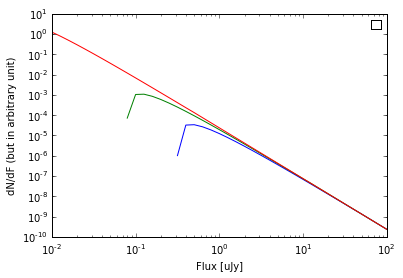

In [72]:
plt.xlabel("Flux [uJy]")
plt.ylabel("dN/dF (but in arbitrary unit)")
plt1 = plt.loglog(F_grid, dN_grid_50pc)
plt2 = plt.loglog(F_grid, dN_grid_100pc)
plt3 = plt.loglog(F_grid, dN_grid_500pc)
plt.legend((plt1, plt2, plt3), ('R=50pc', '100pc', '500pc'))